## Load/Clean Data

In [126]:
import pandas as pd

In [127]:
import matplotlib.pyplot as plt

In [128]:
from collections import Counter

In [129]:
import re

In [149]:
import scipy.stats as stats

In [160]:
import researchpy as rp

In [130]:
df = pd.read_csv('Cognitive Science Experiment.csv')


#### Clean up free-text field responses

In [131]:
def clean_langs(string):
    string = ''.join([x for x in string if re.match(r'[\w\s]', x)])
    if 'Dansk' in string:
        return 'Danish'
    if 'Tysk' in string:
        return 'German'
    return string

In [132]:
# make function to split languages into lists where applicable, then we can get counts of native languages

In [133]:
Counter(df['What is/are your native language(s)? (Can be more than one)'].str.title().str.strip().apply(clean_langs))

Counter({'Danish And Russian': 1,
         'Danish': 51,
         'English': 11,
         'German': 3,
         'Slovak': 3,
         'Danish And English': 3,
         'Spanish': 6,
         'Nepali': 1,
         'Hebrew': 1,
         'English American': 1,
         'Russian': 2,
         'Spanish And English': 1,
         'Dutch': 2,
         'Lithuanian': 2,
         'Romanian': 4,
         'Language': 1,
         'Hindi English': 1,
         'Bulgarien': 1,
         'Hungarian': 1,
         'French': 1,
         'Polish': 2,
         'Greek': 2,
         'EnglishDanish': 1,
         'Danish English': 1})

In [134]:
Counter(df['If so, what other language(s) have you studied/learned?'].dropna().str.title().str.strip().apply(clean_langs))

Counter({'German English Latvian Russian': 1,
         'English And German': 6,
         'Sanskrit Latin Ancient Greek French': 1,
         'English German': 9,
         'English Latin': 1,
         'English German Some Swedish Norwegian French Italian And Spanish': 1,
         'German': 5,
         'English Italian': 1,
         'Hindi English': 1,
         'English': 14,
         'French English': 1,
         'French Latin Russian Hebrew German': 1,
         'French And German': 1,
         'English German And French': 1,
         'Korean': 1,
         'English German Turkish Italian Hindi Portugese': 1,
         'English French': 2,
         'English French Italian': 2,
         'English Russian': 2,
         'English Hindi Tamil': 1,
         'Japanese French': 2,
         'English French Russian': 1,
         'German English Russian': 1,
         'English German Russian Spanish': 1,
         'English German Norwegian French Spanish  Studied Not Learned I Only Speak English And Ger

In [135]:
set(df['What school did you study in? (e.g. Studieskolen)'].str.title().str.strip())

{'Cbs',
 'Clavis',
 'Hellerup Sprogcenter',
 'Hellerup Sprogskole',
 'I Switched Between Helsingør, Hellerup And Lyngby School, And Were In Each Only For A Short Time.',
 'Ia',
 'Ia Sprog',
 'Ia Sprog, Studieskolen',
 'Københavns Sprogcenter',
 'Leardansk',
 'Næstved Sprogskole',
 'Private Teacher, Stydieskolen, Clavis',
 'Public Language Center',
 'Speak School Of Danish',
 'Sprogcenter Aalborg',
 'Sprogcenter Hellerup',
 'Sprogskole',
 'Sprogskolen',
 'Sprogskolen, Hvidovre Gymnasium',
 'Studieskolen',
 'Studieskolen, Kbh Sprogcenter',
 'Studieskolen, Sprogcenter Hellerup',
 'Studieskolen/ Clavis',
 'University And Studieskolen',
 'Vestegnen Sprog Og Kompetence Center (Vsk)',
 'Vuf',
 nan}

In [148]:
df

,Timestamp,Please pick a color,Please read the text above to the best of your ability. Have you read it?,Please read the text above to the best of your ability. Have you read it?.1,"Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?",Hvad sætter Michael pris på ved træningen?,Hvad synes Michaels kone om hans træning?,Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?,Hvor var Michaels første ironman?,Hvor gammel er Michael nu?,...,Which of these statements best describes your Danish communication?,Which of these additional statements best describes your Danish communication?,Have you ever lived in Denmark?,"If so, for how long?",What is your gender?,What is your age?,What is/are your native language(s)? (Can be more than one),"Have you studied/learned any other languages, if yes, please state which?","If so, what other language(s) have you studied/learned?",What is your highest level of education?
0,2019/05/17 1:26:09 PM GMT+2,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...","Ved ikke (kan enten ikke huske det, eller det ...",Hun bryder sig ikke om det.,I et år.,Spanien,48,...,NaN,NaN,NaN,NaN,Female,Under 18,"Danish, and Russian",Yes,"German, English, Latvian, Russian",High school or less
1,2019/05/17 5:06:47 PM GMT+2,Blå,NaN,I have read it.,Han fik mulighed for at løbe sammen med nogle ...,At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,NaN,NaN,NaN,NaN,Male,25-34,Danish,Yes,English and German,Master's Degree +
2,2019/05/17 5:32:01 PM GMT+2,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,Can interact with a degree of fluency and spon...,Can use language flexibly and effectively for ...,Yes,1-3 years,Male,25-34,English,Yes,"Sanskrit, Latin, Ancient Greek, French",Bachelor's Degree or equivalent
3,2019/05/18 10:05:29 AM GMT+2,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,At det er sejt.,I et år.,Spanien,48,...,NaN,NaN,NaN,NaN,Female,18-24,Danish,Yes,"English, German",Bachelor's Degree or equivalent
4,2019/05/18 12:22:47 PM GMT+2,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,"Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...",48,...,NaN,NaN,Yes,3-5 years,Female,18-24,German,Yes,"English, Latin",Bachelor's Degree or equivalent
5,2019/05/19 10:44:29 AM GMT+2,Grøn,I have read it.,NaN,"Hans sønner ville gerne have, at han brugte me...",At den foregår sammen med hans venner.,"Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...",...,NaN,NaN,Yes,1-3 years,Female,18-24,Slovak,Yes,NaN,High school or less
6,2019/05/19 10:47:50 AM GMT+2,Grøn,I have read it.,NaN,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,"Hun var ikke vildt med det i starten, men nu s...",I ti år.,Spanien,48,...,NaN,NaN,NaN,NaN,Male,45-54,Danish,Yes,"English, German, some Swedish, Norwegian, Fren...",Bachelor's Degree or equivalent
7,2019/05/19 10:57:26 AM GMT+2,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,NaN,NaN,Yes,5-10 years,Female,25-34,English,No,NaN,Master's Degree +
8,2019/05/19 10:57:38 AM GMT+2,Grøn,I have read it.,NaN,"Han kunne nemmere holde op med at ryge, når ha...",At den giver ham mere overskud til at være sam...,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,NaN,NaN,NaN,NaN,Male,25-34,Danish and English,Yes,German,Bachelor's Degree or equivalent


In [136]:
set(df['What was your last level learned? (e.g. level 3.1, level A2)'].str.title().str.strip())


{'2.2',
 '2.3',
 '3.3',
 '3.5',
 '3.5 A3 I Think, The One With The Official Exam L',
 '3.6 - Studieprøve, C1',
 '4',
 '5',
 '5.1',
 'A2',
 'B2',
 'B2 (Pd3)',
 'Completed Level 2',
 'Dansk A',
 "Don'T Know, It Was A Basic Intro Course",
 "Don'T Remember, Not High.",
 'Finished The Danish Education (Level 4)',
 'Kan Ikke Huske',
 'Level 5',
 'Modul 5',
 'Modul 6.3 (Level C1)',
 'Module 5 (Passed Pd3)',
 'Pd3',
 'Prøve I Dansk 3',
 'Studieprøven',
 'Studieprøven, Level 6',
 nan}

Make dict of correct answers:

In [137]:
df.columns


Index(['Timestamp', 'Please pick a color',
       'Please read the text above to the best of your ability. Have you read it?',
       'Please read the text above to the best of your ability. Have you read it?.1',
       'Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?',
       'Hvad sætter Michael pris på ved træningen? ',
       'Hvad synes Michaels kone om hans træning? ',
       'Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?',
       'Hvor var Michaels første ironman?', 'Hvor gammel er Michael nu?',
       'Hvornår vil Michael stoppe med at løbe?',
       'Hvordan er stemningen i teksten?',
       'Are you a native speaker of Danish?',
       'Have you studied Danish in a language school?',
       'What school did you study in? (e.g. Studieskolen)',
       'What was your last level learned? (e.g. level 3.1, level A2)',
       'Which of these statements best describes your Danish under

In [138]:
q_a = {
    'Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?':
    'Han kunne nemmere holde op med at ryge, når han trænede.',
    'Hvad sætter Michael pris på ved træningen? ': 'At den foregår sammen med hans venner.',
    'Hvad synes Michaels kone om hans træning? ': 'Hun bryder sig ikke om det.',
    'Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?': 'I et år.',
    'Hvor var Michaels første ironman?' : 'Spanien',
    'Hvor gammel er Michael nu?' : '48',
    'Hvornår vil Michael stoppe med at løbe?' : 'Han vil aldrig stoppe.'
    
}

In [139]:
df_control = df[df['Please pick a color'] == 'Blå']

In [140]:
df_experiment = df[df['Please pick a color'] == 'Grøn']
#df_experiment.head()

In [141]:
df_danes = df[df['Are you a native speaker of Danish?'] == 'Yes']
df_L2 = df[df['Are you a native speaker of Danish?'] == 'No']

In [142]:
df_control_danes = df[(df['Please pick a color'] == 'Blå') & (df['Are you a native speaker of Danish?'] == 'Yes')]
df_experiment_danes = df[(df['Please pick a color'] == 'Grøn') & (df['Are you a native speaker of Danish?'] == 'Yes')]
df_control_L2 = df[(df['Please pick a color'] == 'Blå') & (df['Are you a native speaker of Danish?'] == 'No')]
df_experiment_L2 = df[(df['Please pick a color'] == 'Grøn') & (df['Are you a native speaker of Danish?'] == 'No')]

In [144]:
len(df_control_danes)

25

In [190]:
results_df = pd.DataFrame(columns=['Question','Control', 'Experimental'])
i = 0
for q, a in q_a.items():
    print(q, a)
    control_correct = len(df_control[df[q] == a])
    experiment_correct = len(df_experiment[df[q] == a])
    control_incorrect = len(df_control[df[q] != a])
    experiment_incorrect = len(df_experiment[df[q] != a])
    #print(control_correct, control_incorrect, (control_correct/len(df_control)))
    #print(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment))
    print('Control group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(control_correct, control_incorrect, (control_correct/len(df_control))))
    print('Experimental group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment)))
    results_df.loc[i] = [q, (control_correct/len(df_control)),(experiment_correct/len(df_experiment))]
    i+=1
    
results_df

Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt? Han kunne nemmere holde op med at ryge, når han trænede.
Control group:
 # correct: 42 # incorrect: 6  percent correct: 0.875
Experimental group:
 # correct: 45 # incorrect: 10  percent correct: 0.8181818181818182
Hvad sætter Michael pris på ved træningen?  At den foregår sammen med hans venner.
Control group:
 # correct: 33 # incorrect: 15  percent correct: 0.6875
Experimental group:
 # correct: 39 # incorrect: 16  percent correct: 0.7090909090909091
Hvad synes Michaels kone om hans træning?  Hun bryder sig ikke om det.
Control group:
 # correct: 21 # incorrect: 27  percent correct: 0.4375
Experimental group:
 # correct: 22 # incorrect: 33  percent correct: 0.4
Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman? I et år.
Control group:
 # correct: 34 # incorrect: 14  percent correct: 0.7083333333333334
Experimental group:
 # correct: 41 # incorr

/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python

,Question,Control,Experimental
0,"Da Michael var 38 år, begyndte han at løbe læn...",0.875000,0.818182
1,Hvad sætter Michael pris på ved træningen?,0.687500,0.709091
2,Hvad synes Michaels kone om hans træning?,0.437500,0.400000
3,Hvor lang tid trænede Michael at svømme crawl ...,0.708333,0.745455
4,Hvor var Michaels første ironman?,0.916667,0.909091
5,Hvor gammel er Michael nu?,0.979167,0.909091
6,Hvornår vil Michael stoppe med at løbe?,0.625000,0.600000


levene pvalue 0.8291323983981289 : test is not significant. there is homogeneity of variances and we can proceed.
shapiro pvalue 0.8328438401222229 : test is not significant. the data is indicated to be normally distributed.


(0.8291323983981289, 0.8328438401222229)

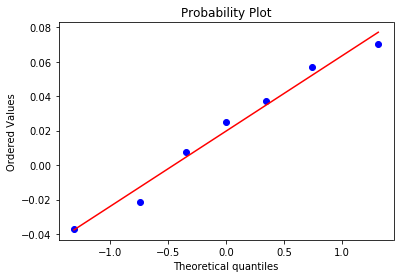

In [194]:
test_stat_independence(results_df, 'Control', 'Experimental')

In [195]:
ttest(results_df, 'Control', 'Experimental')

independent t-test p-value 0.8454825562613734
                                  Independent t-test  results
0             Difference (Control - Experimental) =    0.0198
1                              Degrees of freedom =   12.0000
2                                               t =    0.1991
3                           Two side test p value =    0.8455
4  Mean of Control > mean of Experimental p value =    0.5773
5  Mean of Control < mean of Experimental p value =    0.4227
6                                       Cohen's d =    0.1064
7                                       Hedge's g =    0.0997
8                                   Glass's delta =    0.1044
9                                               r =    0.0574


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Control,7.0,0.747024,0.189201,0.071511,0.572042,0.922005
1,Experimental,7.0,0.727273,0.181818,0.068721,0.559119,0.895426
2,combined,14.0,0.737148,0.178561,0.047723,0.634050,0.840247


## Can we do a t-test?

### Aggregate Accuracy level

levene pvalue 0.8291323983981289 : test is not significant. there is homogeneity of variances and we can proceed.
shapiro pvalue 0.8328438401222229 : test is not significant. the data is indicated to be normally distributed.


(0.8291323983981289, 0.8328438401222229)

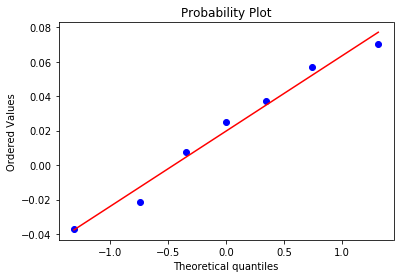

In [192]:
def test_stat_independence(results_df, col1, col2):
    levene = stats.levene(results_df[col1], results_df[col2])
    if levene.pvalue > 0.05:
        print('levene pvalue %s : test is not significant. there is homogeneity of variances and we can proceed.'%(levene.pvalue))
    else:
        print('levene pvalue %s : test is significant. there is NOT homogeneity of variances, so we cannot proceed.'%(levene.pvalue))
        return
    diff = results_df[col1] - results_df[col2]
    stats.probplot(diff, plot= plt)
    shapiro = stats.shapiro(diff)[1]
    if shapiro > 0.05:
        print('shapiro pvalue %s : test is not significant. the data is indicated to be normally distributed.'%(shapiro))
    else:
        print('shapiro pvalue %s : test is significant. the data is NOT indicated to be normally distributed.'%(shapiro))
        return
    return levene.pvalue, shapiro
    
test_stat_independence(results_df, 'Control', 'Experimental')

In [152]:
stats.levene(results_df['Control'], results_df['Experimental'])

LeveneResult(statistic=0.048652860153497034, pvalue=0.8291323983981289)

0.829 means the test is not significant: there is homogeneity of variances and we can proceed. 

((array([-1.31487275, -0.74397649, -0.3471943 ,  0.        ,  0.3471943 ,
          0.74397649,  1.31487275]),
  array([-0.03712121, -0.02159091,  0.00757576,  0.025     ,  0.0375    ,
          0.05681818,  0.07007576])),
 (0.0436288120464838, 0.01975108225108224, 0.9896082858998512))

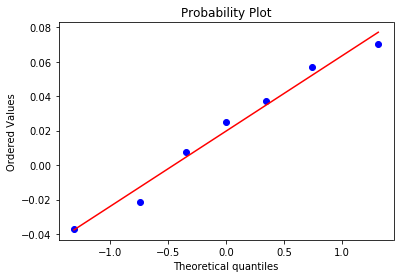

In [153]:
diff = results_df['Control'] - results_df['Experimental']
stats.probplot(diff, plot= plt)

In [156]:
# test for normality
stats.shapiro(diff)

(0.9616599678993225, 0.8328438401222229)

### Subject Accuracy Level

In [157]:
#todo 

## T-test

### Aggregate Accuracy Level

In [188]:
def ttest(results_df, col1, col2):
    ttest_result= stats.ttest_ind(results_df[col1], results_df[col2])
    print('independent t-test p-value %s' %(ttest_result.pvalue))
    descriptives, results = rp.ttest(results_df[col1], results_df[col2])
    print(results)
    return descriptives
          

In [158]:
stats.ttest_ind(results_df['Control'], results_df['Experimental'])

Ttest_indResult(statistic=0.1991465462286075, pvalue=0.8454825562613734)

In [161]:
descriptives, results = rp.ttest(results_df['Control'], results_df['Experimental'])
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Control,7.0,0.747024,0.189201,0.071511,0.572042,0.922005
1,Experimental,7.0,0.727273,0.181818,0.068721,0.559119,0.895426
2,combined,14.0,0.737148,0.178561,0.047723,0.634050,0.840247


In [162]:
results

,Independent t-test,results
0,Difference (Control - Experimental) =,0.0198
1,Degrees of freedom =,12.0000
2,t =,0.1991
3,Two side test p value =,0.8455
4,Mean of Control > mean of Experimental p value =,0.5773
5,Mean of Control < mean of Experimental p value =,0.4227
6,Cohen's d =,0.1064
7,Hedge's g =,0.0997
8,Glass's delta =,0.1044
9,r =,0.0574


Two side test p value = 0.845 > 0.05, there is *no* statistical difference between the scores.

In [167]:
results_df = pd.DataFrame(columns=['Question','Control Danes', 'Experimental Danes', 'Control L2', 'Experimental L2'])
i = 0
for q, a in q_a.items():
    print(q, a)
    dk_control_correct = len(df_control_danes[df[q] == a])
    dk_experiment_correct = len(df_experiment_danes[df[q] == a])
    L2_control_correct = len(df_control_L2[df[q] == a])
    L2_experiment_correct = len(df_experiment_L2[df[q] == a])
    #control_incorrect = len(df_control_danes[df[q] != a])
    #experiment_incorrect = len(df_experiment_danes[df[q] != a])
    #print(control_correct, control_incorrect, (control_correct/len(df_control)))
    #print(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment))
    #print('Control group:\n # correct: %s # incorrect: %s  percent correct: %s' 
    #      %(control_correct, control_incorrect, (control_correct/len(df_control))))
    #print('Experimental group:\n # correct: %s # incorrect: %s  percent correct: %s' 
    #      %(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment)))
    results_df.loc[i] = [q, round((dk_control_correct/len(df_control_danes)),3),round((dk_experiment_correct/len(df_experiment_danes)),3),round((L2_control_correct/len(df_control_L2)),3),round((L2_experiment_correct/len(df_experiment_L2)),3)]
    i+=1
    
results_df

Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt? Han kunne nemmere holde op med at ryge, når han trænede.
Hvad sætter Michael pris på ved træningen?  At den foregår sammen med hans venner.
Hvad synes Michaels kone om hans træning?  Hun bryder sig ikke om det.
Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman? I et år.
Hvor var Michaels første ironman? Spanien
Hvor gammel er Michael nu? 48
Hvornår vil Michael stoppe med at løbe? Han vil aldrig stoppe.


/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python

,Question,Control Danes,Experimental Danes,Control L2,Experimental L2
0,"Da Michael var 38 år, begyndte han at løbe læn...",0.96,0.970,0.783,0.591
1,Hvad sætter Michael pris på ved træningen?,0.76,0.667,0.609,0.773
2,Hvad synes Michaels kone om hans træning?,0.36,0.424,0.522,0.364
3,Hvor lang tid trænede Michael at svømme crawl ...,0.72,0.727,0.696,0.773
4,Hvor var Michaels første ironman?,0.92,0.939,0.913,0.864
5,Hvor gammel er Michael nu?,0.96,0.909,1.000,0.909
6,Hvornår vil Michael stoppe med at løbe?,0.56,0.545,0.696,0.682


In [186]:
results_df = pd.DataFrame(columns=['Question','Danes', 'Immigrants'])
i = 0
for q, a in q_a.items():
    print(q, a)
    control_correct = len(df_danes[df[q] == a])
    experiment_correct = len(df_L2[df[q] == a])
    control_incorrect = len(df_danes[df[q] != a])
    experiment_incorrect = len(df_L2[df[q] != a])
    #print(control_correct, control_incorrect, (control_correct/len(df_control)))
    #print(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment))
    print('Control group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(control_correct, control_incorrect, (control_correct/len(df_control))))
    print('Experimental group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment)))
    results_df.loc[i] = [q, (control_correct/len(df_danes)),(experiment_correct/len(df_L2))]
    i+=1
    
results_df

Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt? Han kunne nemmere holde op med at ryge, når han trænede.
Control group:
 # correct: 56 # incorrect: 2  percent correct: 1.1666666666666667
Experimental group:
 # correct: 31 # incorrect: 14  percent correct: 0.5636363636363636
Hvad sætter Michael pris på ved træningen?  At den foregår sammen med hans venner.
Control group:
 # correct: 41 # incorrect: 17  percent correct: 0.8541666666666666
Experimental group:
 # correct: 31 # incorrect: 14  percent correct: 0.5636363636363636
Hvad synes Michaels kone om hans træning?  Hun bryder sig ikke om det.
Control group:
 # correct: 23 # incorrect: 35  percent correct: 0.4791666666666667
Experimental group:
 # correct: 20 # incorrect: 25  percent correct: 0.36363636363636365
Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman? I et år.
Control group:
 # correct: 42 # incorrect: 16  percent correct: 0.875
Exp

/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python

,Question,Danes,Immigrants
0,"Da Michael var 38 år, begyndte han at løbe læn...",0.965517,0.688889
1,Hvad sætter Michael pris på ved træningen?,0.706897,0.688889
2,Hvad synes Michaels kone om hans træning?,0.396552,0.444444
3,Hvor lang tid trænede Michael at svømme crawl ...,0.724138,0.733333
4,Hvor var Michaels første ironman?,0.931034,0.888889
5,Hvor gammel er Michael nu?,0.931034,0.955556
6,Hvornår vil Michael stoppe med at løbe?,0.551724,0.688889


levene pvalue 0.37590525395696656 : test is not significant. there is homogeneity of variances and we can proceed.
shapiro pvalue 0.15472495555877686 : test is not significant. the data is indicated to be normally distributed.


(0.37590525395696656, 0.15472495555877686)

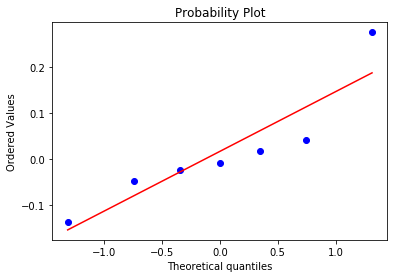

In [181]:
test_stat_independence(results_df, 'Danes', 'Immigrants')

In [189]:
ttest(results_df, 'Danes', 'Immigrants')

independent t-test p-value 0.8720861309871155
                              Independent t-test  results
0             Difference (Danes - Immigrants) =    0.0169
1                          Degrees of freedom =   12.0000
2                                           t =    0.1645
3                       Two side test p value =    0.8721
4  Mean of Danes > mean of Immigrants p value =    0.5640
5  Mean of Danes < mean of Immigrants p value =    0.4360
6                                   Cohen's d =    0.0879
7                                   Hedge's g =    0.0823
8                               Glass's delta =    0.0782
9                                           r =    0.0474


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Danes,7.0,0.743842,0.215443,0.081430,0.544591,0.943094
1,Immigrants,7.0,0.726984,0.164662,0.062236,0.574697,0.879271
2,combined,14.0,0.735413,0.184426,0.049290,0.628929,0.841898


In [147]:
with open('results.tex','w') as rf:
    rf.write(results_df.to_latex(index=False))